# Evaluation

In [73]:
# import libraries
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

In [85]:
# read the data
df_zs = pd.read_csv('..\\Playground_LLM\\EvaluationDatasetZeroShot.csv',
                    delimiter=';')
df_fs = pd.read_csv('..\\Playground_LLM\\EvaluationDatasetFewShot.csv',
                    delimiter=';')

In [80]:
# calculate the accuracy
accuracy_zs = accuracy_score(df_zs['edgeUsable'], df_zs['ZeroShotOutput'])
accuracy_fs = accuracy_score(df_fs['edgeUsable'], df_fs['LLM_FewShot_Output'])
# calcualte the precision, recall and fscore
precision_zs, recall_zs, f1_zs, support_zs = score(df_zs['edgeUsable'],
                                                         df_zs['ZeroShotOutput'],
                                                         average='weighted')
precision_fs, recall_fs, f1_fs, support_fs = score(df_fs['edgeUsable'],
                                                            df_fs['LLM_FewShot_Output'],
                                                            average='weighted')
# print results
print('The accuracy of the ZeroShotOutput is: ', round(accuracy_zs,4))
print('The accuracy of the FewShotOutput is: ', round(accuracy_fs,4))
print()
print('The precision of the ZeroShotOutput is: ', round(precision_zs,4))
print('The precision of the FewShotOutput is: ', round(precision_fs,4))
print()
print('The recall of the ZeroShotOutput is: ', round(recall_zs,4))
print('The recall of the FewShotOutput is: ', round(recall_fs,4))
print()
print('The f1_score of the ZeroShotOutput is: ', round(f1_zs,4))
print('The f1_score of the FewShotOutput is: ', round(f1_fs,4))

The accuracy of the ZeroShotOutput is:  0.8095
The accuracy of the FewShotOutput is:  0.85

The precision of the ZeroShotOutput is:  0.8083
The precision of the FewShotOutput is:  0.8467

The recall of the ZeroShotOutput is:  0.8095
The recall of the FewShotOutput is:  0.85

The f1_score of the ZeroShotOutput is:  0.8
The f1_score of the FewShotOutput is:  0.8458


# ROC Curves

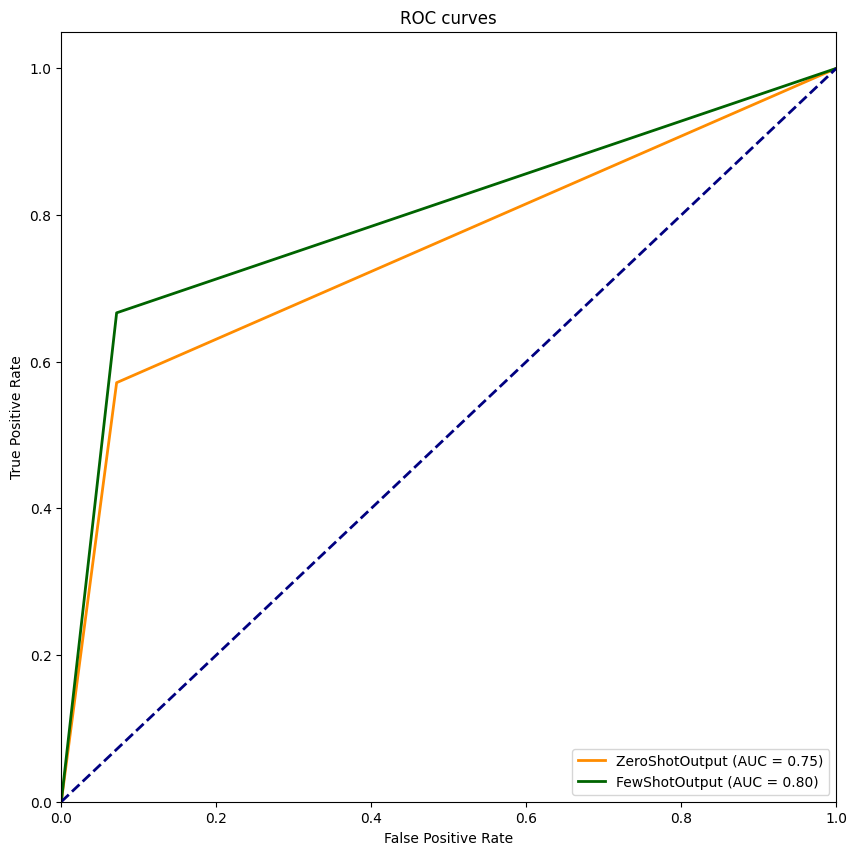

In [84]:
# plot ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# calculate the fpr and tpr for all thresholds of the ZeroShotOutput
fpr_zs, tpr_zs, threshold_zs = roc_curve(df_zs['edgeUsable'], df_zs['ZeroShotOutput'])
roc_auc_zs = auc(fpr_zs, tpr_zs)
# calculate the fpr and tpr for all thresholds of the FewShotOutput
fpr_fs, tpr_fs, threshold_fs = roc_curve(df_fs['edgeUsable'], df_fs['LLM_FewShot_Output'])
roc_auc_fs = auc(fpr_fs, tpr_fs)

# plot the ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr_zs, tpr_zs, color='darkorange', lw=2,
         label='ZeroShotOutput (AUC = %0.2f)' % roc_auc_zs)
plt.plot(fpr_fs, tpr_fs, color='darkgreen', lw=2,
         label='FewShotOutput (AUC = %0.2f)' % roc_auc_fs)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()